### Import the necessary libraries

In [8]:
import pandas as pd
import numpy as np

import datetime

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Import the dataset from this Customer ,prod_info and transaction.csv from the folder

In [9]:
customer= pd.read_csv('E:/BA/Python/1. Python Basic Exercises_For_Submission/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/Customer.csv')
prod_info = pd.read_csv('E:/BA/Python/1. Python Basic Exercises_For_Submission/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv')
transaction= pd.read_csv('E:/BA/Python/1. Python Basic Exercises_For_Submission/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/Transactions.csv')

In [10]:
customer.head(2)


,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [11]:
prod_info.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [12]:
transaction.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [13]:
retail_data=pd.merge(left=transaction,right=prod_info,right_on='prod_cat_code',left_on='prod_cat_code',how='left')
retail_data.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,1,Women


In [14]:
customer_final = pd.merge(left=retail_data, right=customer,right_on="customer_Id", left_on="cust_id", how="left")
customer_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,4,Mens,270351,26-09-1981,M,5.0
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,1,Women,270351,26-09-1981,M,5.0


In [15]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 17 columns):
transaction_id       99293 non-null int64
cust_id              99293 non-null int64
tran_date            99293 non-null object
prod_subcat_code     99293 non-null int64
prod_cat_code        99293 non-null int64
Qty                  99293 non-null int64
Rate                 99293 non-null int64
Tax                  99293 non-null float64
total_amt            99293 non-null float64
Store_type           99293 non-null object
prod_cat             99293 non-null object
prod_sub_cat_code    99293 non-null int64
prod_subcat          99293 non-null object
customer_Id          99293 non-null int64
DOB                  99293 non-null object
Gender               99253 non-null object
city_code            99257 non-null float64
dtypes: float64(3), int64(8), object(6)
memory usage: 13.6+ MB


In [144]:
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format="%d-%m-%Y")

In [147]:
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'])

### Prepare a summary report for the merged data set. (a) Get the column names and their corresponding data types

In [148]:
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_sub_cat_code', 'prod_subcat', 'customer_Id', 'DOB',
       'Gender', 'city_code'],
      dtype='object')

In [159]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 17 columns):
transaction_id       99293 non-null int64
cust_id              99293 non-null int64
tran_date            99293 non-null datetime64[ns]
prod_subcat_code     99293 non-null int64
prod_cat_code        99293 non-null int64
Qty                  99293 non-null int64
Rate                 99293 non-null int64
Tax                  99293 non-null float64
total_amt            99293 non-null float64
Store_type           99293 non-null object
prod_cat             99293 non-null object
prod_sub_cat_code    99293 non-null int64
prod_subcat          99293 non-null object
customer_Id          99293 non-null int64
DOB                  99293 non-null datetime64[ns]
Gender               99253 non-null object
city_code            99257 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(8), object(4)
memory usage: 13.6+ MB


### b. Top/Bottom 10 observations

In [149]:
customer_final.head(10)
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
99283,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,Clothing,Books,10,Non-Fiction,270911,1970-05-22,M,2.0
99284,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,Clothing,Books,11,Children,270911,1970-05-22,M,2.0
99285,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,Clothing,Books,3,Comics,270911,1970-05-22,M,2.0
99286,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,Clothing,Books,6,DIY,270911,1970-05-22,M,2.0
99287,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,Clothing,Books,7,Fiction,271961,1982-01-15,M,1.0
99288,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,Clothing,Books,12,Academic,271961,1982-01-15,M,1.0
99289,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,Clothing,Books,10,Non-Fiction,271961,1982-01-15,M,1.0
99290,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,Clothing,Books,11,Children,271961,1982-01-15,M,1.0
99291,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,Clothing,Books,3,Comics,271961,1982-01-15,M,1.0
99292,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,Clothing,Books,6,DIY,271961,1982-01-15,M,1.0


###  c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [19]:
customer_final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code,customer_Id,city_code
count,9.929300e+04,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99257.000000
mean,5.007320e+10,271030.010635,6.796894,4.003243,2.438017,637.919884,248.873736,2114.616420,6.806985,271030.010635,5.467221
std,2.899361e+10,2429.333624,3.609439,1.563991,2.260726,621.576326,187.014422,2502.306768,3.615952,2429.333624,2.859343
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000,266783.000000,1.000000
25%,2.492150e+10,268956.000000,4.000000,3.000000,1.000000,313.000000,98.280000,762.450000,4.000000,268956.000000,3.000000
50%,5.011083e+10,270982.000000,7.000000,5.000000,3.000000,713.000000,199.920000,1761.370000,7.000000,270982.000000,5.000000
75%,7.528121e+10,273120.000000,10.000000,5.000000,4.000000,1109.000000,366.975000,3585.725000,10.000000,273120.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000,275265.000000,10.000000


### (d) Frequency tables for all the categorical variables

In [20]:
customer_final.loc[ : , customer_final.dtypes=='object'].describe()

,tran_date,Store_type,prod_cat,prod_subcat,DOB,Gender
count,99293,99293,99293,99293,99293,99253
unique,1129,4,6,18,3987,2
top,25-08-2012,e-Shop,Books,Women,27-12-1988,M
freq,153,40185,36414,7957,156,51051


### (3) Generate histograms for all continuous variables and frequency bars for categorical variables

In [168]:
category_customer = customer_final.loc[:,customer_final.dtypes=='int64']
category_customer.head(2)

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,prod_sub_cat_code,customer_Id
0,80712190438,270351,1,1,-5,-772,4,270351
1,80712190438,270351,1,1,-5,-772,1,270351


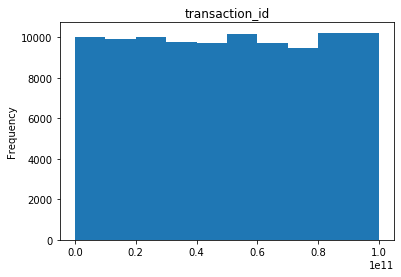

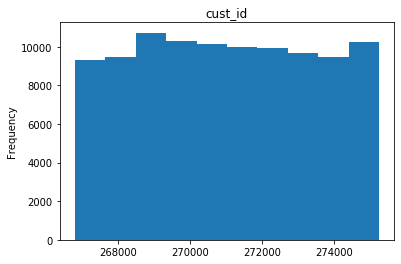

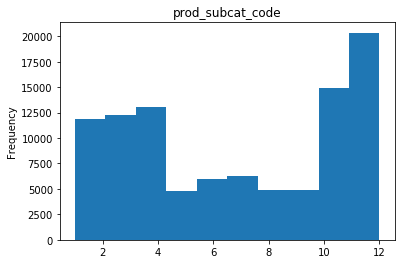

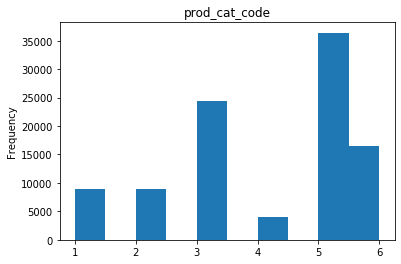

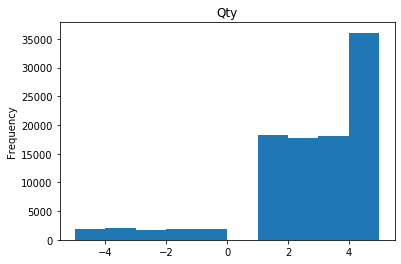

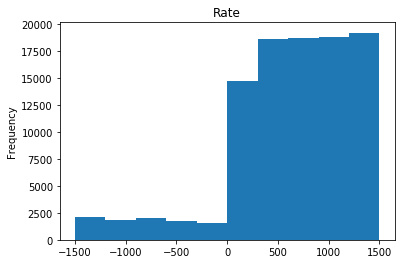

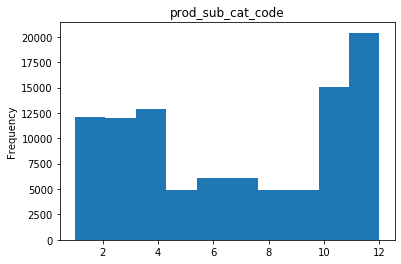

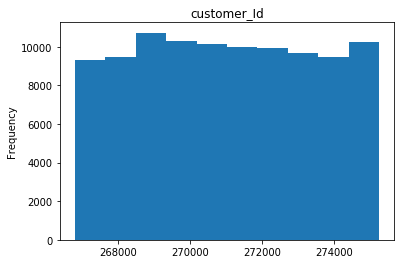

In [169]:
for var in category_customer.columns:
    category_customer[var].plot(kind='hist')
    plt.title(var)
    plt.show()

### (4) Calculate the following information using the merged dataset:¶ (a) Time period of the available transaction data

In [151]:
customer_final.tran_date

0       2014-02-28
1       2014-02-28
2       2014-02-28
3       2014-02-27
4       2014-02-27
           ...    
99288   2011-01-25
99289   2011-01-25
99290   2011-01-25
99291   2011-01-25
99292   2011-01-25
Name: tran_date, Length: 99293, dtype: datetime64[ns]

### (b) Count of transactions where the total amount of transaction was negative

In [25]:
customer_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,4,Mens,270351,26-09-1981,M,5.0
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,1,Women,270351,26-09-1981,M,5.0


In [44]:
customer_final.loc[customer_final.total_amt < 0,'total_amt'].count()


9294

### (5) Analyze which product categories are more popular among females vs male customers¶

In [62]:
customer_final.groupby(['Gender','prod_cat'])[['Qty']].sum().reset_index()

,Gender,prod_cat,Qty
0,F,Bags,4724
1,F,Books,42420
2,F,Clothing,10275
3,F,Electronics,29160
4,F,Footwear,11148
5,F,Home and kitchen,19580
6,M,Bags,4692
7,M,Books,45522
8,M,Clothing,11244
9,M,Electronics,32380


### (6) Which City code has the maximum customers and what was the percentage of customers from that city?

In [77]:
max_city=customer_final.groupby('city_code').customer_Id.count().sort_values(ascending=False)
max_city.head(1)

city_code
4.0    10571
Name: customer_Id, dtype: int64

In [74]:
perc_cust = max_city[4.0]*100/max_city.sum()
perc_cust

10.65013046938755

### (7) Which store type sells the maximum products by value and by quantity?

In [91]:
customer_final.groupby('Store_type')['Qty','Rate'].count().sort_values(by='Qty',ascending=False).head(1)


,Qty,Rate
Store_type,,
e-Shop,40185,40185


### (8) What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [171]:
amount_earned = customer_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum')
amount_earned 

Store_type,Clothing
prod_cat,
Bags,8.249417e+06
Books,7.693616e+07
Clothing,1.875341e+07
Electronics,5.361232e+07
Footwear,1.865932e+07
Home and kitchen,3.375597e+07


### (9) What was the total amount earned from "Male" customers under the "Electronics" category?

In [119]:
male_amount=customer_final.pivot_table(index='prod_cat',columns='Gender',values='total_amt',aggfunc='sum')
male_amount

Gender,F,M
prod_cat,,
Bags,4.155971e+06,4.093446e+06
Books,3.698815e+07,3.987584e+07
Clothing,9.080252e+06,9.672238e+06
Electronics,2.509677e+07,2.851555e+07
Footwear,9.607659e+06,9.044016e+06
Home and kitchen,1.652871e+07,1.720430e+07


In [118]:
male_amount.loc['Electronics','M']

28515547.12499976

### (10) How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [141]:
uniq_trans=customer_final[customer_final.total_amt >= 0]
uniq_trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
45,29258453508,270384,20-02-2014,5,3,5,1497,785.925,8270.925,Clothing,Electronics,4,Mobiles,270384,11-05-1973,F,8.0
46,29258453508,270384,20-02-2014,5,3,5,1497,785.925,8270.925,Clothing,Electronics,5,Computers,270384,11-05-1973,F,8.0
47,29258453508,270384,20-02-2014,5,3,5,1497,785.925,8270.925,Clothing,Electronics,8,Personal Appliances,270384,11-05-1973,F,8.0
48,29258453508,270384,20-02-2014,5,3,5,1497,785.925,8270.925,Clothing,Electronics,9,Cameras,270384,11-05-1973,F,8.0
49,29258453508,270384,20-02-2014,5,3,5,1497,785.925,8270.925,Clothing,Electronics,10,Audio and video,270384,11-05-1973,F,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,Clothing,Books,12,Academic,271961,15-01-1982,M,1.0
99289,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,Clothing,Books,10,Non-Fiction,271961,15-01-1982,M,1.0
99290,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,Clothing,Books,11,Children,271961,15-01-1982,M,1.0
99291,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,Clothing,Books,3,Comics,271961,15-01-1982,M,1.0


In [142]:
uniq_trans1=uniq_trans.groupby(['customer_Id','prod_cat'])['transaction_id'].count().reset_index()
uniq_trans1

,customer_Id,prod_cat,transaction_id
0,266783,Books,6
1,266783,Clothing,6
2,266783,Footwear,3
3,266784,Books,12
4,266784,Electronics,5
...,...,...,...
15071,275264,Books,6
15072,275264,Home and kitchen,4
15073,275265,Bags,2
15074,275265,Books,6


In [143]:
uniq_trans1[uniq_trans1['transaction_id']>10]

,customer_Id,prod_cat,transaction_id
3,266784,Books,12
7,266785,Footwear,12
13,266794,Books,12
15,266794,Electronics,15
43,266814,Home and kitchen,12
...,...,...,...
15042,275245,Books,12
15051,275249,Books,18
15055,275250,Footwear,12
15058,275252,Books,18


### (11) For all customers aged between 25-35, find out:
### (a) What was the total amount spent for 'Electronics' and 'Books' product categories?

In [ ]:
Not understand for age between

### (b) What was the total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014?

In [154]:
total_amount = customer_final[(customer_final['tran_date'] >='2014-01-01') & (customer_final['tran_date'] <='2014-03-01')]

In [156]:
total_amount['total_amt'].sum()

6033290.055